## EDA - Data Correctness Check

Author: Sicong Zhao \
Email: sicong.zhao@duke.edu

The data source of this research came from 2 experiments (name codes: ROO, DND) with the similar survey plan. However, to ensure the correctness of future analysis, we decided to check the consistency of the data analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10, 6)})

### 1.Load the Data

In [2]:
exp = pd.read_csv('exp_steps_hr_sleep_survey.csv')

### 2.Visualize the Suspicous Data

I went through the boxplot of 208 features and detected following columns are suspicious

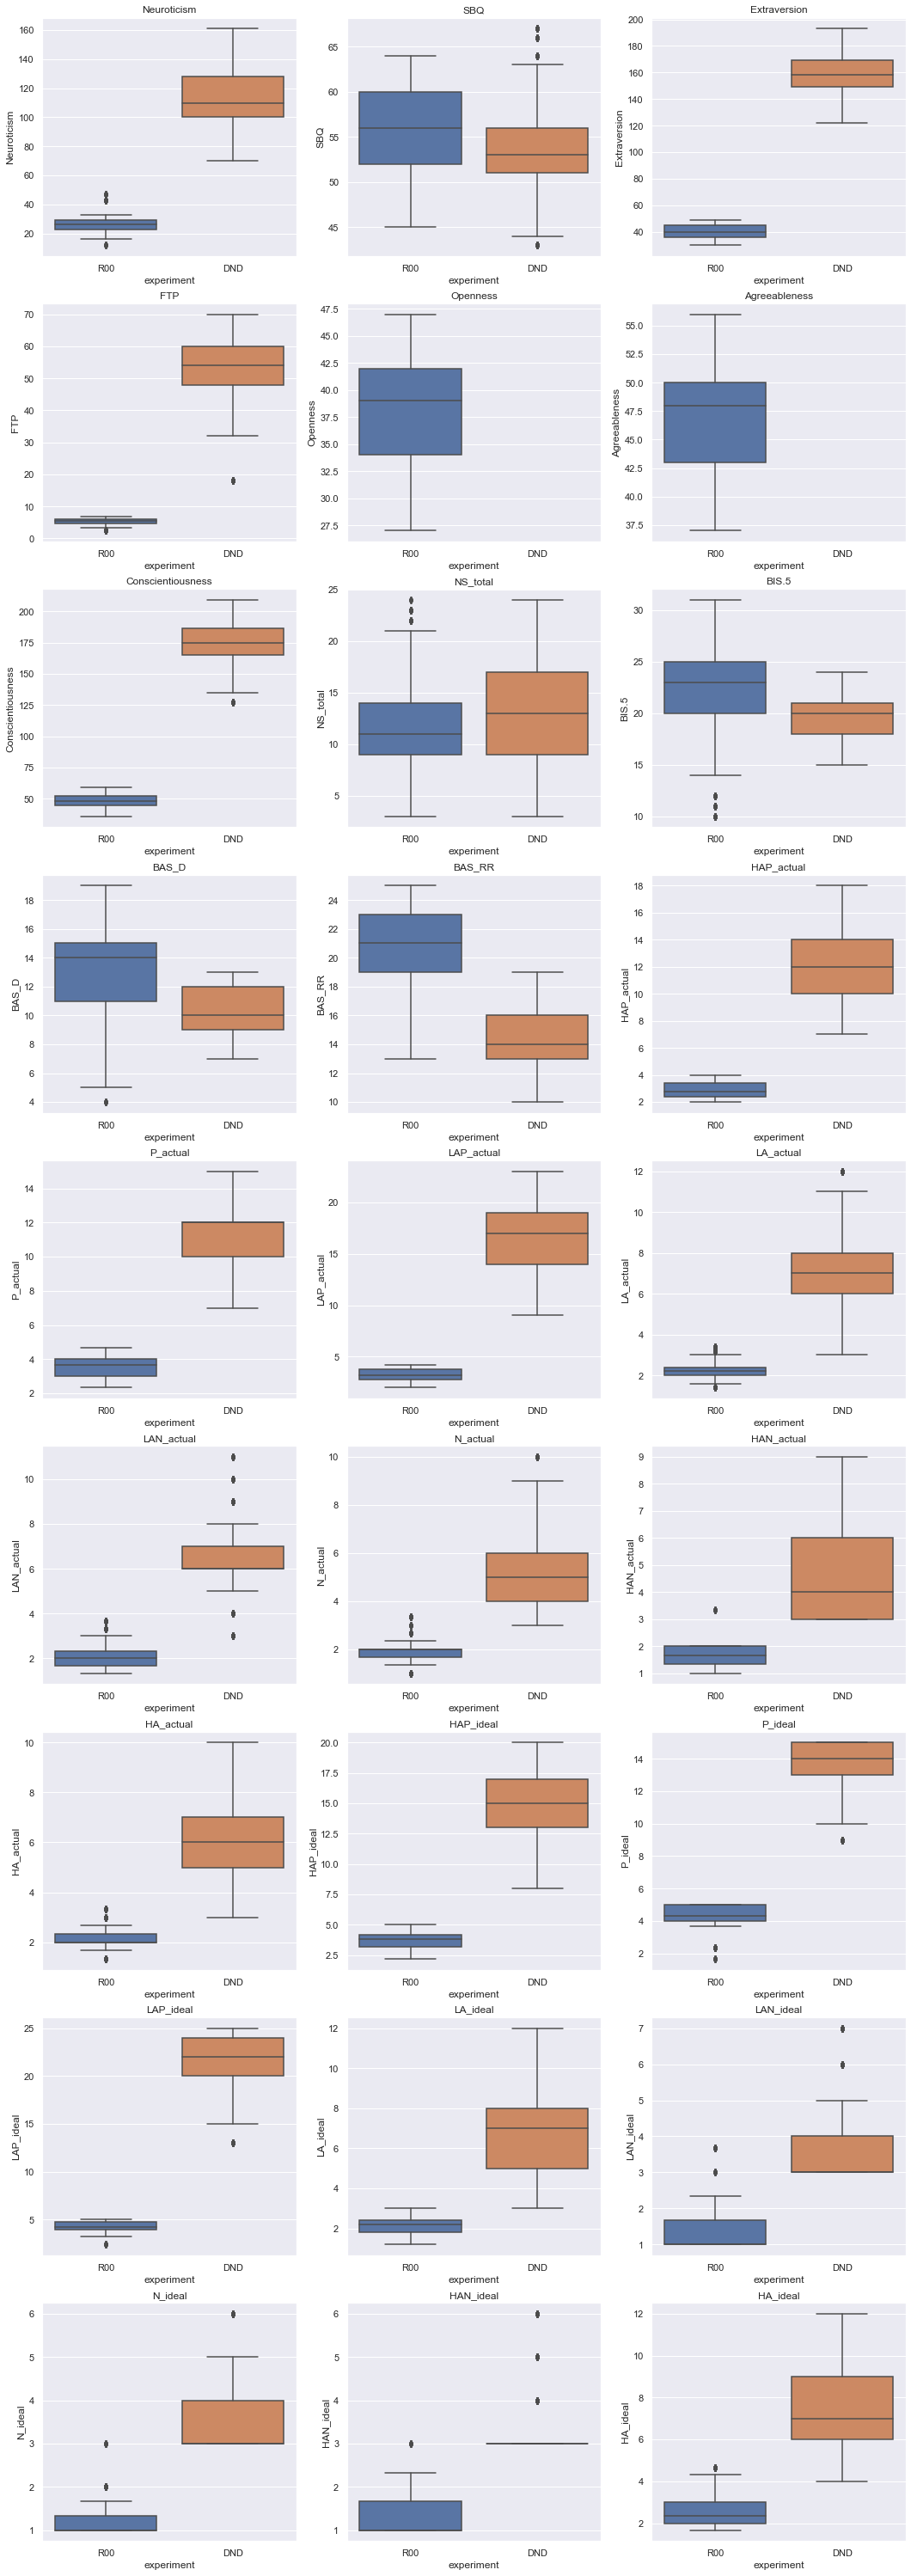

In [3]:
suspicious_cols = ['Neuroticism', 'SBQ', 'Extraversion', 'FTP', 'Openness', 
              'Agreeableness', 'Conscientiousness', 'NS_total', 'BIS.5', 
              'BAS_D', 'BAS_RR', 'HAP_actual', 'P_actual', 'LAP_actual', 
              'LA_actual', 'LAN_actual', 'N_actual', 'HAN_actual', 
              'HA_actual', 'HAP_ideal', 'P_ideal', 'LAP_ideal',
              'LA_ideal', 'LAN_ideal', 'N_ideal', 'HAN_ideal', 'HA_ideal']

# Visualization
f, axs = plt.subplots(9, 3, figsize=(18,54))
axs = axs.flatten()
count = 0
for col in suspicious_cols:
    sns.boxplot(x="experiment", y=col, data=exp, ax=axs[count]);
    axs[count].set_title(col)
    count += 1

### 3.Data Quality Report

After scrutiny, 27 variables seem to be inconsistent accross ROO and DND.They belong to 3 categories:

**(1) Affect Valuation Index (AVI)** (16)
    * The problem is, in ROO experiment, we are using average value, but in DND experiment, we are using sum.

**(2) Personality Measurement** (5)
    1. Neuroticism: Scale not aligned
    2. Extraversion: Scale not aligned
    3. Conscientiousness: Scale not aligned
    4. Agreeableness: Completely missing in DND
    5. Openness: Completely missing in DND
**(3) Others** (6)
    1. ~~SBQ~~
    2. FTP
    3. ~~NS_total~~
    4. ~~BIS.5~~
    5. ~~BAS_D~~
    6. ~~BAS_RR~~
    According to Prof. Greg, only FTP suffer from scaling issue. The rest are due to variation among population.

### 4.Data Correction Plan

**(1) Affect Valuation Index (AVI)** (16)
    * For these features divided by 5 in DND experience: 
    > ['HAP_actual', 'LAP_actual', 'LA_actual', 'HAP_ideal', 'LAP_ideal', 'LA_ideal']
    * For these features divided by 3 in DND experience: 
    > ['HAN_actual', 'HAN_ideal', 'HA_actual', 'HA_ideal', 'LAN_actual', 'LAN_ideal', 'N_actual', 'N_ideal', 'P_actual', 'P_ideal']

**(2) Personality Measurement** (5)
    1. Neuroticism: ROO data times 4
    2. Extraversion: ROO data times 4
    3. Conscientiousness: ROO data times 4
    4. Agreeableness: Drop, since not existed in DND
    5. Openness: Drop, since not existed in DND
**(3) Others** (6)
    1. FTP: ROO data times 10

### 5.Fix Data Issue

(1) AVI

In [4]:
col_div_5 = ['HAP_actual', 'LAP_actual', 'LA_actual', 'HAP_ideal', 'LAP_ideal', 'LA_ideal']
col_div_3 = ['HAN_actual', 'HAN_ideal', 'HA_actual', 'HA_ideal', 'LAN_actual', 'LAN_ideal', 'N_actual', 'N_ideal', 'P_actual', 'P_ideal']
exp.loc[exp['experiment']=='DND', col_div_5] = exp.loc[exp['experiment']=='DND', col_div_5] / 5
exp.loc[exp['experiment']=='DND', col_div_3] = exp.loc[exp['experiment']=='DND', col_div_3] / 3

(2) Personality

In [5]:
col_persona = ['Neuroticism','Extraversion','Conscientiousness']
exp.loc[exp['experiment']=='R00', col_persona] = exp.loc[exp['experiment']=='R00', col_persona] * 4

(3) Others

In [6]:
exp.loc[exp['experiment']=='R00', 'FTP'] = exp.loc[exp['experiment']=='R00', 'FTP'] * 10

### 6.Confirm Modification

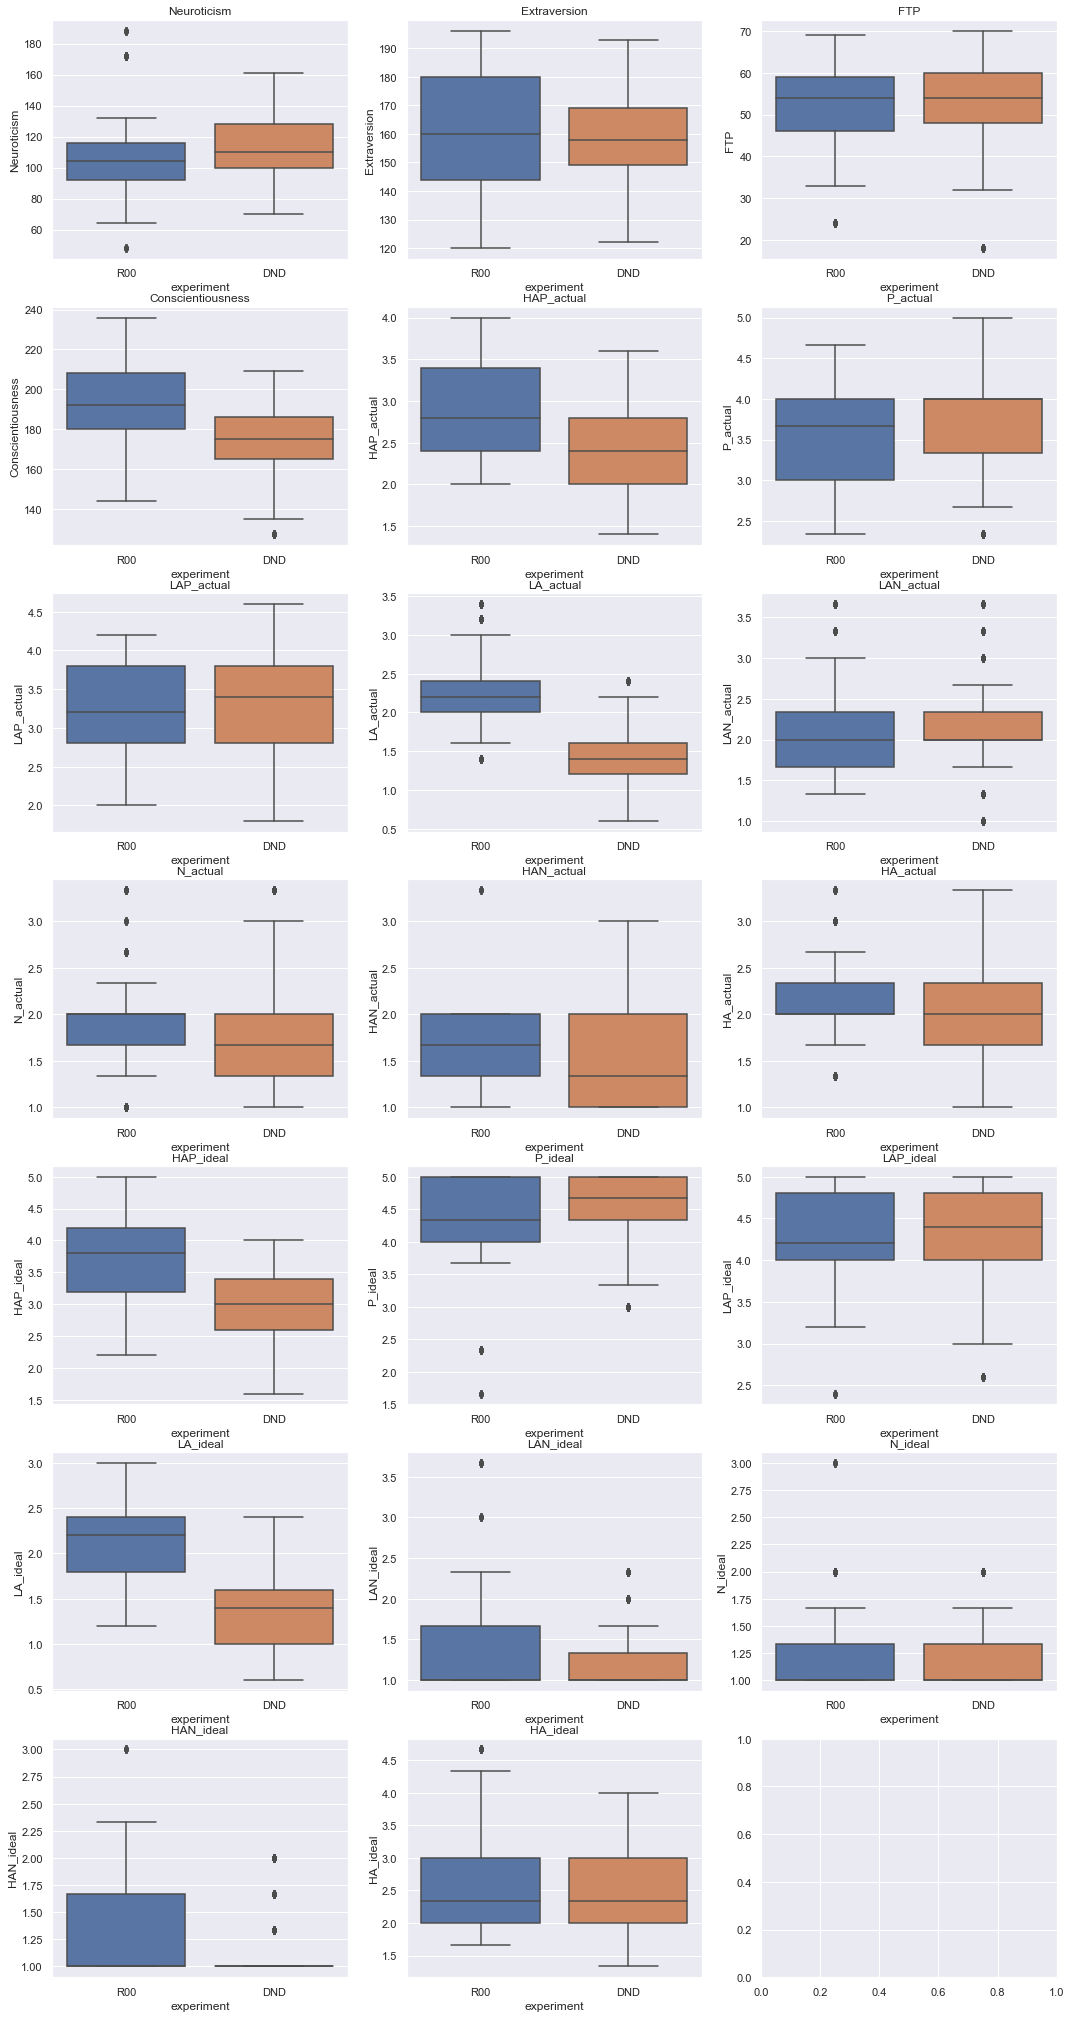

In [7]:
suspicious_cols = ['Neuroticism', 'Extraversion', 'FTP', 
              'Conscientiousness', 
              'HAP_actual', 'P_actual', 'LAP_actual', 
              'LA_actual', 'LAN_actual', 'N_actual', 'HAN_actual', 
              'HA_actual', 'HAP_ideal', 'P_ideal', 'LAP_ideal',
              'LA_ideal', 'LAN_ideal', 'N_ideal', 'HAN_ideal', 'HA_ideal']

# Visualization
f, axs = plt.subplots(7, 3, figsize=(18,36))
axs = axs.flatten()
count = 0
for col in suspicious_cols:
    sns.boxplot(x="experiment", y=col, data=exp, ax=axs[count]);
    axs[count].set_title(col)
    count += 1

### 7.Include Brain Connectivity Data

In [8]:
dnd_r2r = pd.read_csv('data/dnd_r2r.csv')
r00_r2r = pd.read_csv('data/r00_r2r.csv')

In [22]:
dnd_r2r['Subject'] = 'DND1' + dnd_r2r['Subject'].astype(str).str.zfill(3)

In [24]:
r2r = pd.concat([dnd_r2r,r00_r2r])

In [29]:
exp['subject'] = exp['subject'].astype(str)
r2r['Subject'] = r2r['Subject'].astype(str)
exp_r2r = pd.merge(exp, r2r, left_on='subject', right_on='Subject', how='left')

### 8.Export

In [32]:
exp_r2r.to_csv('exp_r2r.csv')

In [33]:
exp_r2r.head()

Unnamed: 0 subject  la_p  ha_p  ha_n  la_n   la    p    n   ha  ...  \
0           0    1047   2.0   3.0   1.0   1.0  2.0  4.0  1.0  1.0  ...   
1           1    1047   2.0   1.0   1.0   2.0  3.0  3.0  1.0  1.0  ...   
2           2    1047   3.0   3.0   1.0   1.0  3.0  5.0  1.0  1.0  ...   
3           3    1047   4.0   3.0   1.0   1.0  2.0  4.0  1.0  1.0  ...   
4           4    1047   4.0   1.0   1.0   2.0  4.0  2.0  1.0  1.0  ...   

  Household_income  Religion   Age Medications        BMI  survey_hour  \
0  $90,000-$99,999       NaN  43.0        None  27.328927         13.0   
1  $90,000-$99,999       NaN  43.0        None  27.328927          7.0   
2  $90,000-$99,999       NaN  43.0        None  27.328927         15.0   
3  $90,000-$99,999       NaN  43.0        None  27.328927         21.0   
4  $90,000-$99,999       NaN  43.0        None  27.328927          7.0   

   Subject_y  r2r_corr Experiment_y    Corr_z  
0       1047  0.356312          R00  0.372656  
1       1047  0.356312          R00  0.372656  
2       1047  0.356312          R00  0.372656  
3       1047  0.356312          R00  0.372656  
4       1047  0.356312          R00  0.372656  

[5 rows x 210 columns]